# MNIST Handwriting Data Analysis
#### by: Arash Hosseini Jafari

The purpose of this project is to build and train decision tree, random forest,and KNN models to classify the didgits into their respective numerical catagories. 

Preprocessing: 

No preprecessing was neccessary other than reducing the ammount of training and test images to avoid computational limitations. 

Faramework: 

The SKLearn framework was used to perform all machine learning tasks.

Other Packages:

Numpy was used for data handling. Matplotlib was used for basic visualization. Graphviz, Pydotplus, and Ipython were used to visualize the decision tree.

------------------------------------------


## SVM example (from class):

Support Vector Machine example was used in class to tackle a similar problem with the Minst Data Set. I chose to include the example in my report in order to broaden my analysis and compare the efficacy of decision tree, random forest, and KNN, with SVM. The example also included pre-existing code which facilitated the acuisition of data, as well as the creation of testing and training sets.

In [1]:
from sklearn import *

In [2]:
import numpy as np

Data was imported directly using fetch_openml as in class.

In [3]:
# Downloading the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) 
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [136]:
example = mnist["data"][-1].reshape(28, 28)

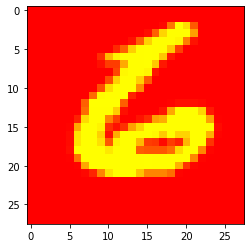

In [137]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.imshow(example, cmap=mpl.cm.autumn)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import svm

Testing and training sets were created using train_test_split. Only first 5000 of data set was used for computational limitations

In [7]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"][:5000], mnist["target"][:5000], test_size=0.2)

In [8]:
svm_clf = svm.SVC(kernel="linear",)

In [9]:
mod = svm_clf.fit(X_train, y_train)


In [10]:
svm_clf.fit(X_train, y_train)

y_prediction = svm_clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, svm_clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, y_prediction))
print (" Confusion matrix ", confusion_matrix(y_test, y_prediction))

Train Accuracy ::  1.0
Test Accuracy  ::  0.906
 Confusion matrix  [[ 89   0   0   0   0   0   1   1   0   0]
 [  0 106   2   0   0   1   0   1   0   1]
 [  2   1  93   1   6   0   1   1   3   0]
 [  0   0   1  87   1   8   0   2   0   0]
 [  1   1   2   0 108   0   0   0   0   5]
 [  0   0   0  10   2  64   0   0   2   0]
 [  1   0   0   0   2   0  96   0   0   0]
 [  1   1   1   0   0   0   0  96   0   5]
 [  1   4   1   1   0   2   2   2  84   1]
 [  0   0   1   1   3   0   0   6   1  83]]


In [181]:
print(train-labels-idx1-ubyte)

NameError: name 'train' is not defined

Creating a 

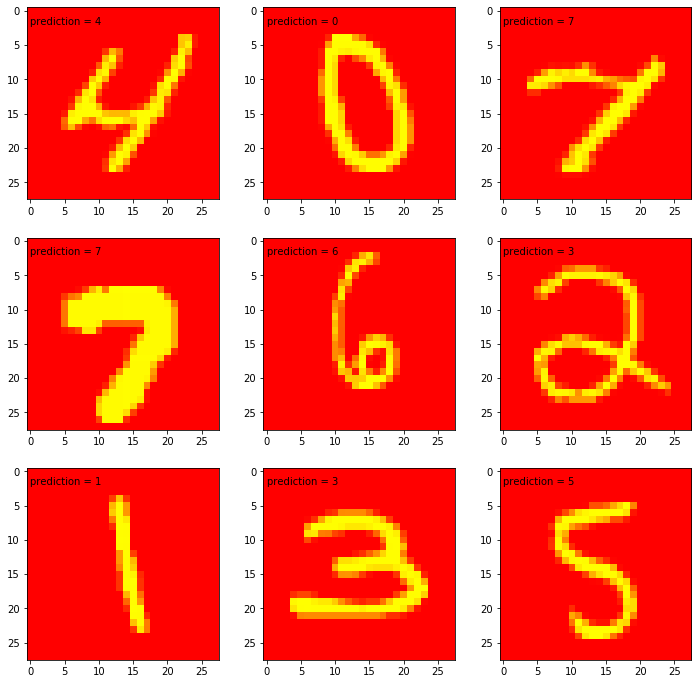

In [11]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.autumn)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()


----------------------------------------------------------
# Decision Tree

------------------------------------------------------ 
Decision tree (DT) is one of the few transparant AI models that allow for the explanation of decison making by the classifier. Every node of the tree asks a question about the data set. The issue with applying this the techhnique here is that it can lead to overfitting. In adition, the task at hand is primarily a image classification task, not for example, medical decision making algorythem. And it is unclear how the presence of DT by the model can be valuable. There are also too many obscure features, such as each pixel of the image. Therefore the transparancy that DT provides for this task may not be so valuable. 



##### depth .. other metrics entropy



In [173]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import timeit

In [174]:
tic=timeit.default_timer()

TreeCLF = tree.DecisionTreeClassifier()
print (TreeCLF)
tree = TreeCLF.fit(X_train,y_train)
t_prediction = TreeCLF.predict(X_test)
scoreTree = TreeCLF.score(X_test,y_test)
print(scoreTree)

toc=timeit.default_timer()
timeee= toc - tic
tstamp= print("\nTIME PASSED: ",toc-tic)
print("\nTIME PASSED: ",timeee)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.774

TIME PASSED:  0.5207462670005043

TIME PASSED:  0.5207462670005043


In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                #feature_names= ["Fever","Nausea","Lumbar_pain","Urine","Mic_Pain","Buring"], 
                class_names= ["1","2","3","4","5","6","7","8","9","10"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.515943 to fit



check that https://scikit-learn.org/stable/modules/model_evaluation.html for more options
 maybe apply the testing method bove and add importance classes
 
 try making the features like the one in the link
 http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
 make-owne

In [140]:


import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def Eval (model):
    
    predictions = model.predict(X_test)
    print ("\nTrain Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("\nTest Accuracy  : ", accuracy_score(y_test, predictions))
    confmat = confusion_matrix(y_test, predictions)
    #print (" Confusion matrix ", confmat)

        #plots confusion matrix non-normalized
    cm = metrics.confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
    plt.show()

    #plots confusion matrix normalized
    plot_confusion_matrix(cm, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], normalize=True)
    plt.show()

    j = 331
    for i in range(0,9):
        example = X_test[i].reshape(28, 28)
        plt.subplot(j); plt.imshow(example, cmap=mpl.cm.autumn)
        plt.text(0, 5, "prediction = {}".format(y_prediction[i]))
        j+=1

    plt.show()
    from sklearn.metrics import classification_report
    
    print("\nCLASSIFICATION REPORT WITH PERCISION AND REACALL\n")
    target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
    print(classification_report(y_test, predictions, target_names=target_names))
    
    print (" \nTHE MOST IMPORTANT PIXELS (features)")
    try:
        impz= model.feature_importances_.reshape(28, 28)
        plt.imshow(impz, cmap=mpl.cm.autumn)

        plt.figure(figsize=(12, 12))
    except:
        print( "\nFeature importance is not possible in this model since it is unsupervised\n" )





Train Accuracy :  1.0

Test Accuracy  :  0.769

Confusion matrix, without normalization


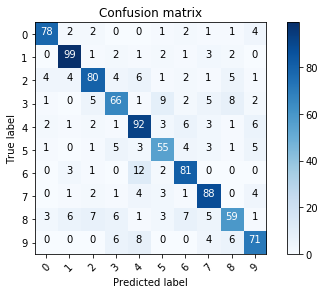


Normalized confusion matrix


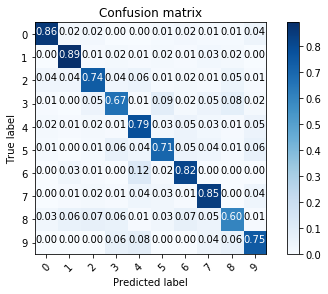

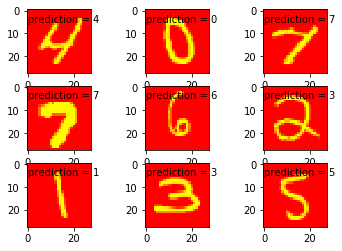


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        91
           1       0.85      0.89      0.87       111
           2       0.79      0.74      0.77       108
           3       0.73      0.67      0.69        99
           4       0.72      0.79      0.75       117
           5       0.70      0.71      0.70        78
           6       0.76      0.82      0.79        99
           7       0.78      0.85      0.81       104
           8       0.71      0.60      0.65        98
           9       0.76      0.75      0.75        95

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

 
THE MOST IMPORTANT PIXELS (features)


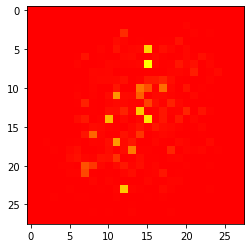

<Figure size 864x864 with 0 Axes>

In [132]:
Eval(tree)


----------------------------------------------------------
## Random Forest

------------------------------------------------------ 

The benefit of using Random Forest (RF) is that it avoids the overfitting that is likely to occur with Decision tree. Random forest algorithem averages probabilities of multiple decision tress and as evident below, gives a more accurate prediction.

In [160]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [163]:
tic
RandCLF = RandomForestClassifier()
RndTree = RandCLF.fit(X_train,y_train)
print (RndTree)
toc
print('TIME PASSED', toc-tic)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
TIME PASSED 0.5191199560003952


/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Train Accuracy :  0.998

Test Accuracy  :  0.879

Confusion matrix, without normalization


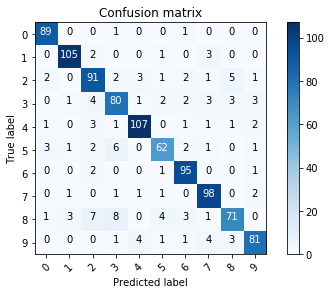


Normalized confusion matrix


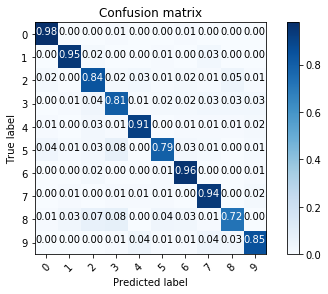

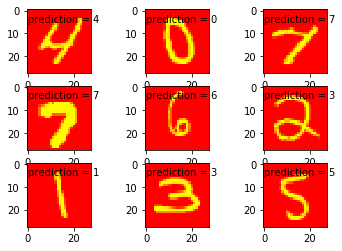


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        91
           1       0.95      0.95      0.95       111
           2       0.82      0.84      0.83       108
           3       0.80      0.81      0.80        99
           4       0.92      0.91      0.92       117
           5       0.85      0.79      0.82        78
           6       0.89      0.96      0.92        99
           7       0.88      0.94      0.91       104
           8       0.86      0.72      0.78        98
           9       0.89      0.85      0.87        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

 
THE MOST IMPORTANT PIXELS (features)


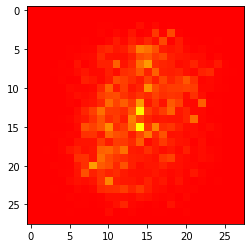

<Figure size 864x864 with 0 Axes>

In [162]:
Eval(RndTree)


----------------------------------------------------------
## KNN Algorythem

------------------------------------------------------ 
K-Nearest Neighbour is a simple non-paramentric classifier, meaning the number of paramenters are not pre determined. KNN looks at K points from the training set that are closest to the test set. In cases where you do not know the final number of classes you take a best guess estimate of k. Ulternatively, you can induce a Voroni Tessellation by chosing a k=1. In this scenario, we know that we are looking for 10 digits, therefore, I chose a k of 10.

In [164]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, p= 1)
knnCFL = neigh.fit(X_train,y_train) 
print (knnCFL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')



Train Accuracy :  0.96475

Test Accuracy  :  0.921

Confusion matrix, without normalization


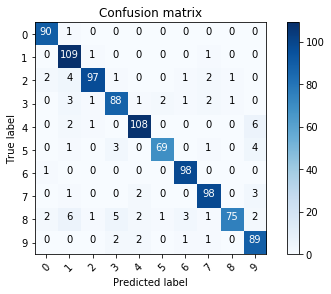


Normalized confusion matrix


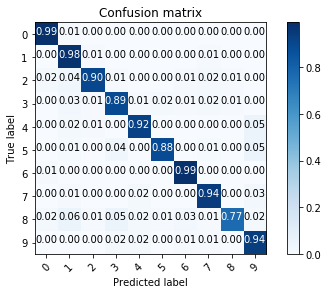

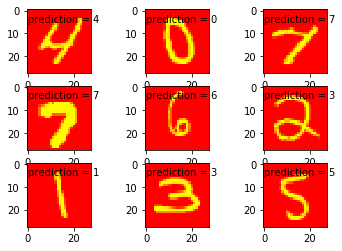


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        91
           1       0.86      0.98      0.92       111
           2       0.96      0.90      0.93       108
           3       0.89      0.89      0.89        99
           4       0.94      0.92      0.93       117
           5       0.96      0.88      0.92        78
           6       0.94      0.99      0.97        99
           7       0.92      0.94      0.93       104
           8       0.97      0.77      0.86        98
           9       0.86      0.94      0.89        95

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not possible in this model since it is unsupervised

TIME:  0.5207462670005043 



In [178]:
tic
Eval(knnCFL)
toc
print("TIME: ", toc-tic,"\n")

In [122]:
neigh = KNeighborsClassifier(n_neighbors=10, p= 2)
knnCFL = neigh.fit(X_train,y_train) 
print (knnCFL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')



Train Accuracy :  0.94325

Test Accuracy  :  0.91

Confusion matrix, without normalization


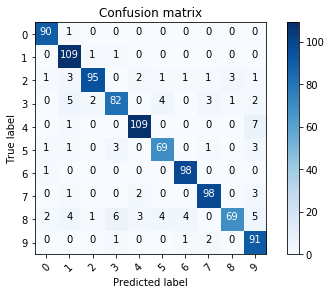


Normalized confusion matrix


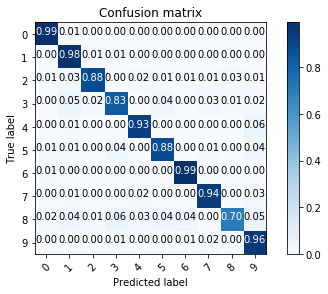

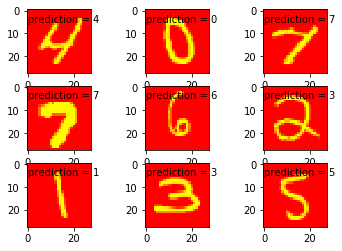


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        91
           1       0.87      0.98      0.92       111
           2       0.96      0.88      0.92       108
           3       0.88      0.83      0.85        99
           4       0.94      0.93      0.94       117
           5       0.88      0.88      0.88        78
           6       0.94      0.99      0.97        99
           7       0.93      0.94      0.94       104
           8       0.95      0.70      0.81        98
           9       0.81      0.96      0.88        95

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

 
THE MOST IMPORTANT PIXELS (features)


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [123]:
Eval(knnCFL)

In [124]:
neigh = KNeighborsClassifier(n_neighbors=1, p= 3, n_jobs = -1)
knnCFL = neigh.fit(X_train,y_train) 
print (knnCFL)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=3,
                     weights='uniform')



Train Accuracy :  1.0

Test Accuracy  :  0.929

Confusion matrix, without normalization


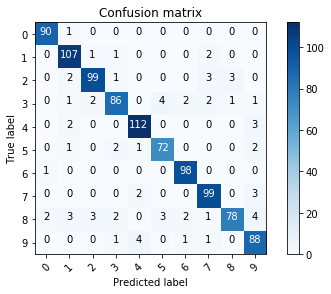


Normalized confusion matrix


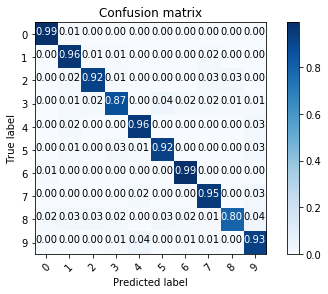

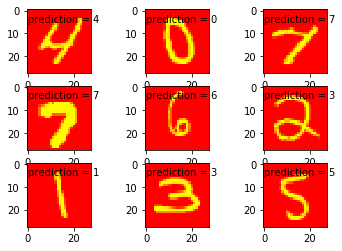


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.91      0.96      0.94       111
           2       0.94      0.92      0.93       108
           3       0.92      0.87      0.90        99
           4       0.94      0.96      0.95       117
           5       0.91      0.92      0.92        78
           6       0.95      0.99      0.97        99
           7       0.92      0.95      0.93       104
           8       0.95      0.80      0.87        98
           9       0.87      0.93      0.90        95

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

 
THE MOST IMPORTANT PIXELS (features)

Feature importance is not available in this model since it is unsupervised


In [134]:
tic
Eval(knnCFL)
toc
print("TIME: ", toc-tic,"\n")

In [179]:
from sklearn.neural_network import MLPClassifier
tic
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 1000), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)                         
toc
print("TIME: ", toc-tic,"\n")


TIME:  0.5207462670005043 



In [129]:
predictions = clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.916
 Confusion matrix  [[ 87   0   0   0   0   0   2   1   0   1]
 [  0 103   2   1   0   0   0   1   3   1]
 [  1   2  94   2   1   1   1   2   3   1]
 [  0   0   2  82   1   8   0   3   2   1]
 [  0   1   2   0 110   0   1   0   0   3]
 [  1   0   1   3   0  72   0   0   0   1]
 [  0   0   3   0   0   1  95   0   0   0]
 [  0   1   0   1   1   0   0  99   0   2]
 [  0   1   0   0   0   4   2   1  87   3]
 [  0   0   0   0   3   1   1   3   0  87]]



Train Accuracy :  1.0

Test Accuracy  :  0.916

Confusion matrix, without normalization


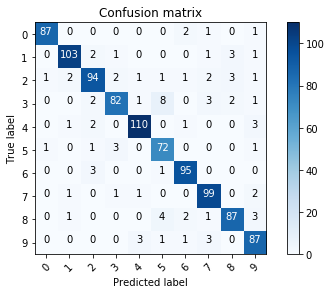


Normalized confusion matrix


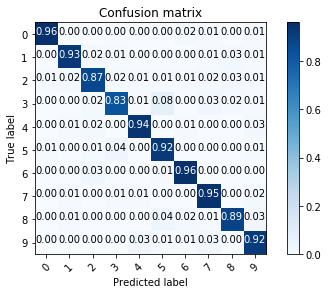

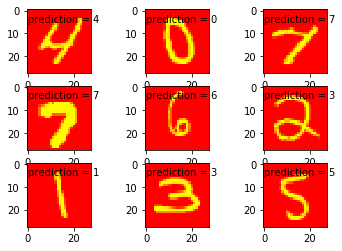


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        91
           1       0.95      0.93      0.94       111
           2       0.90      0.87      0.89       108
           3       0.92      0.83      0.87        99
           4       0.95      0.94      0.94       117
           5       0.83      0.92      0.87        78
           6       0.93      0.96      0.95        99
           7       0.90      0.95      0.93       104
           8       0.92      0.89      0.90        98
           9       0.87      0.92      0.89        95

    accuracy                           0.92      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.92      0.92      0.92      1000

 
THE MOST IMPORTANT PIXELS (features)


AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [130]:
Eval(clf)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), random_state=1, max_iter= 10000)

clf.fit(X_train, y_train)     

In [ ]:
predictions = clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), random_state=1, max_iter= 10000, learning_rate= 'adaptive')

clf.fit(X_train, y_train) 

In [ ]:
predictions = clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

In [ ]:
clf = MLPClassifier(activation= 'tanh', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), random_state=1, max_iter= 10000, learning_rate= 'adaptive')

clf.fit(X_train, y_train) 

In [4]:
predictions = clf.predict(X_test)
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print (" Confusion matrix ", confusion_matrix(y_test, predictions))

NameError: name 'clf' is not defined